# Notebook para modelamiento

In [1]:
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import pandas as pd
import keras    
from sklearn.model_selection import train_test_split
import seaborn as sns

2024-12-02 10:30:53.843436: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# registre el experimento
mlflow.set_tracking_uri("mlruns")
# mlflow.set_tracking_uri('http://localhost:5000')
experiment = mlflow.set_experiment('proyecto3-icfes_test')

In [3]:
df= pd.read_csv("../ingeniera_de_datos/clean_saber11.csv")

In [4]:
df.drop(columns="Unnamed: 0",inplace=True)
df.columns

Index(['periodo', 'estu_tipodocumento', 'cole_area_ubicacion', 'cole_bilingue',
       'cole_caracter', 'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion',
       'cole_naturaleza', 'cole_sede_principal', 'estu_genero',
       'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre',
       'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil',
       'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora',
       'desemp_ingles', 'punt_ingles', 'punt_matematicas',
       'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica',
       'punt_global'],
      dtype='object')

In [5]:
df.dtypes

periodo                       int64
estu_tipodocumento           object
cole_area_ubicacion          object
cole_bilingue                object
cole_caracter                object
cole_genero                  object
cole_jornada                 object
cole_mcpio_ubicacion         object
cole_naturaleza              object
cole_sede_principal          object
estu_genero                  object
fami_cuartoshogar            object
fami_educacionmadre          object
fami_educacionpadre          object
fami_estratovivienda         object
fami_personashogar           object
fami_tieneautomovil          object
fami_tienecomputador         object
fami_tieneinternet           object
fami_tienelavadora           object
desemp_ingles                object
punt_ingles                 float64
punt_matematicas            float64
punt_sociales_ciudadanas      int64
punt_c_naturales              int64
punt_lectura_critica          int64
punt_global                   int64
dtype: object

In [6]:
estu_tipodocumento_to_num={"CC":0,"TI":1,"OTHER":2}
zona = {'RURAL': 0,'URBANO': 1}
cole_bilingue_to_num = {"N":0,"S":1,"unknown":-10}
cole_caracter_to_num={"ACADÉMICO":0,"NO APLICA":1, "TÉCNICO":2, "TÉCNICO/ACADÉMICO":3}
cole_genero_to_num={"FEMENINO":0,"MASCULINO":1,"MIXTO":2}
cole_jornada_to_num={"COMPLETA":0,"MAÑANA":1,"NOCHE":2,"SABATINA":3,"TARDE":4,"UNICA":5}
cole_naturaleza_to_num={"NO OFICIAL":0,"OFICIAL":1}
cole_sede_principal_to_num={"S":0,"N":1}
estu_genero_to_num= {"F":0,"M":1,"unknown":-10}
fami_cuartoshogar_to_num={"1 a 2":0,"3 a 4":1,"5":2,"6+":3,"unknown":-10}
fami_educacionm_to_num={"Educación profesional completa":0,
                    "Educación profesional incompleta":1,
                    "Ninguno":2,
                    "No Aplica":2,
                    "No sabe":2,
                    "Postgrado":3,
                    "Primaria completa":4,
                    "Primaria incompleta":5,
                    "Secundaria (Bachillerato) completa":6,
                    "Secundaria (Bachillerato) incompleta":7,
                    "Técnica o tecnológica completa":8,
                    "Técnica o tecnológica incompleta":9,
                    "unknown":-10}
fami_estratovivienda_to_num={ "Estrato 1":1 ,"Estrato 2":2,"Estrato 3":3,"Estrato 4":4,"Estrato 5":5,"Estrato 6":6,"Sin Estrato": -10}
fami_personashogar_to_num = {"1 a 2":0,"3 a 4":1,"5 a 6":2,"7 a 8":3,"9 o más":4,"unknown":-10}
nosi_to_num={"No":0,"Si":1,	"unknown":-10}

In [7]:
df["punt_matematicas"]= df["punt_matematicas"].astype("int64")
df["punt_ingles"]= df["punt_ingles"].astype("int64")
df["periodo"]= df["periodo"].astype("string")
df["estu_tipodocumento"]= df["estu_tipodocumento"].apply(lambda x: estu_tipodocumento_to_num[x])
df["cole_area_ubicacion"]= df["cole_area_ubicacion"].apply(lambda x: zona[x])
df["cole_bilingue"]=df["cole_bilingue"].apply(lambda x: cole_bilingue_to_num[x])
df["cole_caracter"]=df["cole_caracter"].apply(lambda x: cole_caracter_to_num[x])
df["cole_genero"]=df["cole_genero"].apply(lambda x: cole_genero_to_num[x])
df["cole_jornada"]=df["cole_jornada"].apply(lambda x: cole_jornada_to_num[x])
df["cole_mcpio_ubicacion"]=df["cole_mcpio_ubicacion"].astype("category")
df["cole_naturaleza"]=df["cole_naturaleza"].apply(lambda x: cole_naturaleza_to_num[x])
df["cole_sede_principal"]=df["cole_sede_principal"].apply(lambda x: cole_sede_principal_to_num[x])
df["estu_genero"]=df["estu_genero"].apply(lambda x: estu_genero_to_num[x])
df["fami_cuartoshogar"]=df["fami_cuartoshogar"].apply(lambda x: fami_cuartoshogar_to_num[x])
df["fami_educacionmadre"]=df["fami_educacionmadre"].apply(lambda x: fami_educacionm_to_num[x])
df["fami_educacionpadre"]=df["fami_educacionpadre"].apply(lambda x: fami_educacionm_to_num[x])
df["fami_estratovivienda"]=df["fami_estratovivienda"].apply(lambda x: fami_estratovivienda_to_num[x])
df["fami_personashogar"]=df["fami_personashogar"].apply(lambda x: fami_personashogar_to_num[x])
df["fami_tieneautomovil"]=df["fami_tieneautomovil"].apply(lambda x: nosi_to_num[x])
df["fami_tienecomputador"]=df["fami_tienecomputador"].apply(lambda x: nosi_to_num[x])
df["fami_tieneinternet"]=df["fami_tieneinternet"].apply(lambda x: nosi_to_num[x])
df["fami_tienelavadora"]=df["fami_tienelavadora"].apply(lambda x: nosi_to_num[x])
df["desemp_ingles"]=df["desemp_ingles"].astype("category")

In [8]:
df.dtypes

periodo                     string[python]
estu_tipodocumento                   int64
cole_area_ubicacion                  int64
cole_bilingue                        int64
cole_caracter                        int64
cole_genero                          int64
cole_jornada                         int64
cole_mcpio_ubicacion              category
cole_naturaleza                      int64
cole_sede_principal                  int64
estu_genero                          int64
fami_cuartoshogar                    int64
fami_educacionmadre                  int64
fami_educacionpadre                  int64
fami_estratovivienda                 int64
fami_personashogar                   int64
fami_tieneautomovil                  int64
fami_tienecomputador                 int64
fami_tieneinternet                   int64
fami_tienelavadora                   int64
desemp_ingles                     category
punt_ingles                          int64
punt_matematicas                     int64
punt_social

In [9]:
df.columns

Index(['periodo', 'estu_tipodocumento', 'cole_area_ubicacion', 'cole_bilingue',
       'cole_caracter', 'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion',
       'cole_naturaleza', 'cole_sede_principal', 'estu_genero',
       'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre',
       'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil',
       'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora',
       'desemp_ingles', 'punt_ingles', 'punt_matematicas',
       'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica',
       'punt_global'],
      dtype='object')

In [10]:
cat_string_feats=["periodo","cole_mcpio_ubicacion"]
cat_num_feats=["estu_tipodocumento","cole_area_ubicacion","cole_bilingue","cole_caracter","cole_genero","cole_jornada","cole_naturaleza","cole_sede_principal","estu_genero","fami_cuartoshogar","fami_educacionmadre","fami_educacionpadre","fami_estratovivienda","fami_personashogar","fami_tieneautomovil","fami_tienecomputador","fami_tieneinternet","fami_tienelavadora"]
possible_targets=["punt_ingles","punt_matematicas","punt_sociales_ciudadanas","punt_c_naturales","punt_lectura_critica","punt_global"]
possible_targets_cat=["desemp_ingles"]

# Define the target to use

In [11]:
target="punt_global"

In [12]:
# sns.pairplot(df,)

In [13]:
feats_ordered = cat_num_feats+cat_string_feats

In [14]:
df = df[feats_ordered+[target]]

In [15]:
df.head()

,estu_tipodocumento,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_genero,cole_jornada,cole_naturaleza,cole_sede_principal,estu_genero,fami_cuartoshogar,...,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,periodo,cole_mcpio_ubicacion,punt_global
0,1,0,0,0,2,1,1,1,1,1,...,5,2,2,0,1,1,1,20224,GARZÓN,248
1,1,0,0,0,2,0,1,1,1,3,...,1,2,2,0,0,1,0,20224,PALERMO,168
2,0,1,0,0,2,3,0,0,0,1,...,6,1,2,0,0,0,1,20224,PITALITO,290
3,1,1,0,0,2,5,1,0,1,-10,...,2,1,-10,-10,-10,1,-10,20224,NEIVA,314
4,0,1,0,3,2,5,1,0,0,0,...,4,1,2,0,0,0,1,20224,GARZÓN,241


Separamos los datos en entrenamiento, validación y prueba

In [16]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,estu_tipodocumento,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_genero,cole_jornada,cole_naturaleza,cole_sede_principal,estu_genero,fami_cuartoshogar,...,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,periodo,cole_mcpio_ubicacion,punt_global
66539,0,0,-10,0,2,2,1,0,0,1,...,2,-10,2,0,0,0,1,20172,GARZON,205
68564,1,1,-10,0,2,0,0,0,1,1,...,7,4,1,1,1,1,1,20194,NEIVA,288
4629,1,1,0,2,2,5,1,0,1,1,...,6,2,2,0,1,1,0,20194,NEIVA,224
34051,1,0,-10,0,2,0,1,0,1,1,...,5,1,3,0,0,0,0,20142,GUADALUPE,196
36651,1,0,-10,0,2,0,1,0,1,1,...,7,1,2,0,0,0,0,20172,TARQUI,270


In [17]:
test = df.drop(train.index)
test.head()

,estu_tipodocumento,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_genero,cole_jornada,cole_naturaleza,cole_sede_principal,estu_genero,fami_cuartoshogar,...,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,periodo,cole_mcpio_ubicacion,punt_global
1,1,0,0,0,2,0,1,1,1,3,...,1,2,2,0,0,1,0,20224,PALERMO,168
9,1,1,-10,2,2,5,1,0,0,0,...,5,1,1,0,0,0,0,20224,NEIVA,277
10,1,0,0,2,2,5,1,0,1,1,...,7,3,2,1,1,1,1,20224,BARAYA,237
15,0,0,-10,0,2,0,1,0,1,1,...,2,2,2,0,0,0,1,20224,ISNOS,215
17,1,1,0,0,2,1,0,0,0,1,...,0,3,1,1,1,1,1,20142,NEIVA,263


In [18]:
val = train.sample(frac=0.2, random_state=100)
val.shape

(13328, 21)

In [19]:
train = train.drop(val.index)

In [20]:
print(f"orginal df shape: {df.shape}")
print(train.shape)
print(val.shape)
print(test.shape)

orginal df shape: (83297, 21)
(53310, 21)
(13328, 21)
(16659, 21)


Calculamos estadísticas de cada variable numérica

In [21]:
train.describe()

,estu_tipodocumento,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_genero,cole_jornada,cole_naturaleza,cole_sede_principal,estu_genero,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,punt_global
count,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000,53310.000000
mean,0.823898,0.752973,-1.657813,1.422153,1.982667,1.578916,0.801688,0.023298,0.433877,0.528062,4.571506,4.346352,1.119977,1.334815,0.017370,0.314500,0.153348,0.394222,252.780773
std,0.415669,0.431287,3.726138,1.417092,0.165377,1.651044,0.398732,0.150849,0.545177,1.540109,3.227442,3.142525,2.430596,1.747125,1.449533,1.472981,1.813550,1.474559,47.016011
min,0.000000,0.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,21.000000
25%,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,218.000000
50%,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,249.000000
75%,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,1.000000,0.000000,1.000000,1.000000,6.000000,6.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,284.000000
max,2.000000,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,1.000000,1.000000,3.000000,9.000000,9.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,461.000000


Función para convertir de dataframe (pandas) a dataset (tensorflow), separando características y etiquetas

In [22]:
def dataframe_to_dataset(dataframe,_target=target):
    dataframe = dataframe.copy()
    labels = dataframe.pop(_target)
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [23]:
train_ds = dataframe_to_dataset(train)
val_ds = dataframe_to_dataset(val)
test_ds = dataframe_to_dataset(test)
type(train_ds)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [24]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'estu_tipodocumento': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cole_area_ubicacion': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cole_bilingue': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cole_caracter': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'cole_genero': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'cole_jornada': <tf.Tensor: shape=(), dtype=int64, numpy=5>, 'cole_naturaleza': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cole_sede_principal': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'estu_genero': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'fami_cuartoshogar': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'fami_educacionmadre': <tf.Tensor: shape=(), dtype=int64, numpy=6>, 'fami_educacionpadre': <tf.Tensor: shape=(), dtype=int64, numpy=5>, 'fami_estratovivienda': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'fami_personashogar': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'fami_tieneautomovil': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'fami_tienecom

2024-12-02 10:31:01.268662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Separamos los datos de entrenamiento, validación y prueba en lotes

In [25]:
batch_size = 32
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

Función para codificar variables numéricas (Keras docs)

In [26]:
def encode_numerical_feature(feature, name, dataset):
    # Crea capa de normalización para este feature
    normalizer = keras.layers.Normalization()

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende las estadísticas de los datos (media, varianza)
    normalizer.adapt(feature_ds)

    # Aplica la normalización a la variable
    encoded_feature = normalizer(feature)
    return encoded_feature

Función para codificar variables categóricas (Keras docs)

In [27]:
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    # Crea una capa Lookup para retornas variables 0/1 (dummies)
    # lookup: busca el valor correspondiente de la variable categórica
    lookup = lookup_class(output_mode="binary")

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende el conjunto de posibles valores que toma la variable categórica y asigna enteros
    lookup.adapt(feature_ds)

    # Aplica la conversión de categorías a enteros
    encoded_feature = lookup(feature)
    return encoded_feature

Creamos una lista de inputs para el modelo, de acuerdo con cada tipo de variable

In [28]:
inputs = []
for i in cat_num_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="int64"))

In [29]:
for i in cat_string_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="string"))

In [30]:
# for i in num_feats:
#   inputs.append(keras.Input(shape=(1,), name=i))

In [31]:
for i in inputs:
   print(i)

<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=estu_tipodocumento>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_area_ubicacion>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_bilingue>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_caracter>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_genero>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_jornada>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_naturaleza>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_sede_principal>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=estu_genero>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fami_cuartoshogar>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fami_educacionmadre>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fami_educacionpadre>
<KerasTensor shape=(None, 1), dtype=int64, spa

Creamos una lista de variables codificadas/normalizadas de acuerdo con su tipo, empleando las funciones de codificación/normalización

In [32]:
feats_encoded=[]
for i,feat in enumerate(cat_num_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[i], feat, train_ds, False)
  )
len_feats=len(feats_encoded)
print(len_feats)

2024-12-02 10:31:05.690768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-02 10:31:07.872950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-02 10:31:09.971951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-02 10:31:12.300830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-02 10:31:14.598954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-02 10:31:16.603361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-02 10:31:18.717636: W tensorflow/core/framework/local_rendezvous.cc:404] L

18


2024-12-02 10:31:41.070068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [33]:
for i,feat in enumerate(cat_string_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[len_feats+i], feat, train_ds, True)
  )
len_feats = len(feats_encoded)
print(len_feats)

2024-12-02 10:31:43.211956: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


20


2024-12-02 10:31:45.223928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [34]:
# for i,feat in enumerate(num_feats):
#   feats_encoded.append(
#       encode_numerical_feature(inputs[len_feats+i], feat, train_ds)
#   )

In [35]:
for i in feats_encoded:
  print(i)

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_1>
<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_2>
<KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_3>
<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_4>
<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_5>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_6>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_7>
<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_8>
<KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_9>
<KerasTensor shape=(None, 12), dtype=float32, sparse=False, name=keras_tensor_10>
<KerasTensor shape=(None, 12), dtype=float32, sparse=False, name=keras_tensor_11>
<KerasTensor shape=(None, 8), dtype=fl

Creamos una capa concatenando todas las variables codificadas

In [36]:
all_feats = keras.layers.concatenate(feats_encoded)
type(all_feats)

keras.src.backend.common.keras_tensor.KerasTensor

In [37]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [38]:
with mlflow.start_run(experiment_id=experiment.experiment_id):
    #Agregamos una capa densa con 32 neuronas y función de activación relu
    num_neuronas=120
    loss_function='mean_absolute_error'
    epochs=10
    # Registre los parámetros
    mlflow.log_param("num_nueronas", num_neuronas)
    mlflow.log_param("loss_function", loss_function)
    mlflow.log_param("epochs", epochs)
    model_layers = keras.layers.Dense(num_neuronas, activation='relu')(all_feats)
    model_output = keras.layers.Dense(1,activation='relu')(model_layers)
    #Creamos el modelo con las capas ya creadas y las variables de entrada
    model = keras.Model(inputs,model_output)
    #Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar
    model.compile(optimizer='adam', loss=loss_function, metrics=['mse','mae'])
    hist= model.fit(train_ds, epochs=epochs, validation_data=val_ds)
    results = model.evaluate(test_ds, verbose=0)

    # Assuming you have the metric names as defined in `model.metrics_names`
    print("Resultados para modelo base")
    for name, value in zip(model.metrics_names, results):
        mlflow.log_metric(key=f"{name}",value=value)

Epoch 1/10
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 102.2984 - mae: 102.2984 - mse: 19705.4023 - val_loss: 31.3603 - val_mae: 31.3603 - val_mse: 1538.5872
Epoch 2/10
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 30.9311 - mae: 30.9311 - mse: 1498.0533 - val_loss: 31.0730 - val_mae: 31.0730 - val_mse: 1514.0055
Epoch 3/10
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 30.7640 - mae: 30.7640 - mse: 1485.4684 - val_loss: 31.2899 - val_mae: 31.2899 - val_mse: 1547.5994
Epoch 4/10
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 30.5283 - mae: 30.5283 - mse: 1471.3658 - val_loss: 30.7807 - val_mae: 30.7807 - val_mse: 1487.8286
Epoch 5/10
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 30.3988 - mae: 30.3988 - mse: 1452.0660 - val_loss: 30.8306 - val_mae: 30.8306 - val_mse: 1499.8160
Epoch 6/10
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 30.2249 - mae: 30.2249 - mse: 1439.3274 - val_loss: 30.5847 - val_mae: 30.5847 - val_mse: 1464.8829
Epoch 7/10
1666/1666 ━━━━

In [39]:
model

<Functional name=functional, built=True>

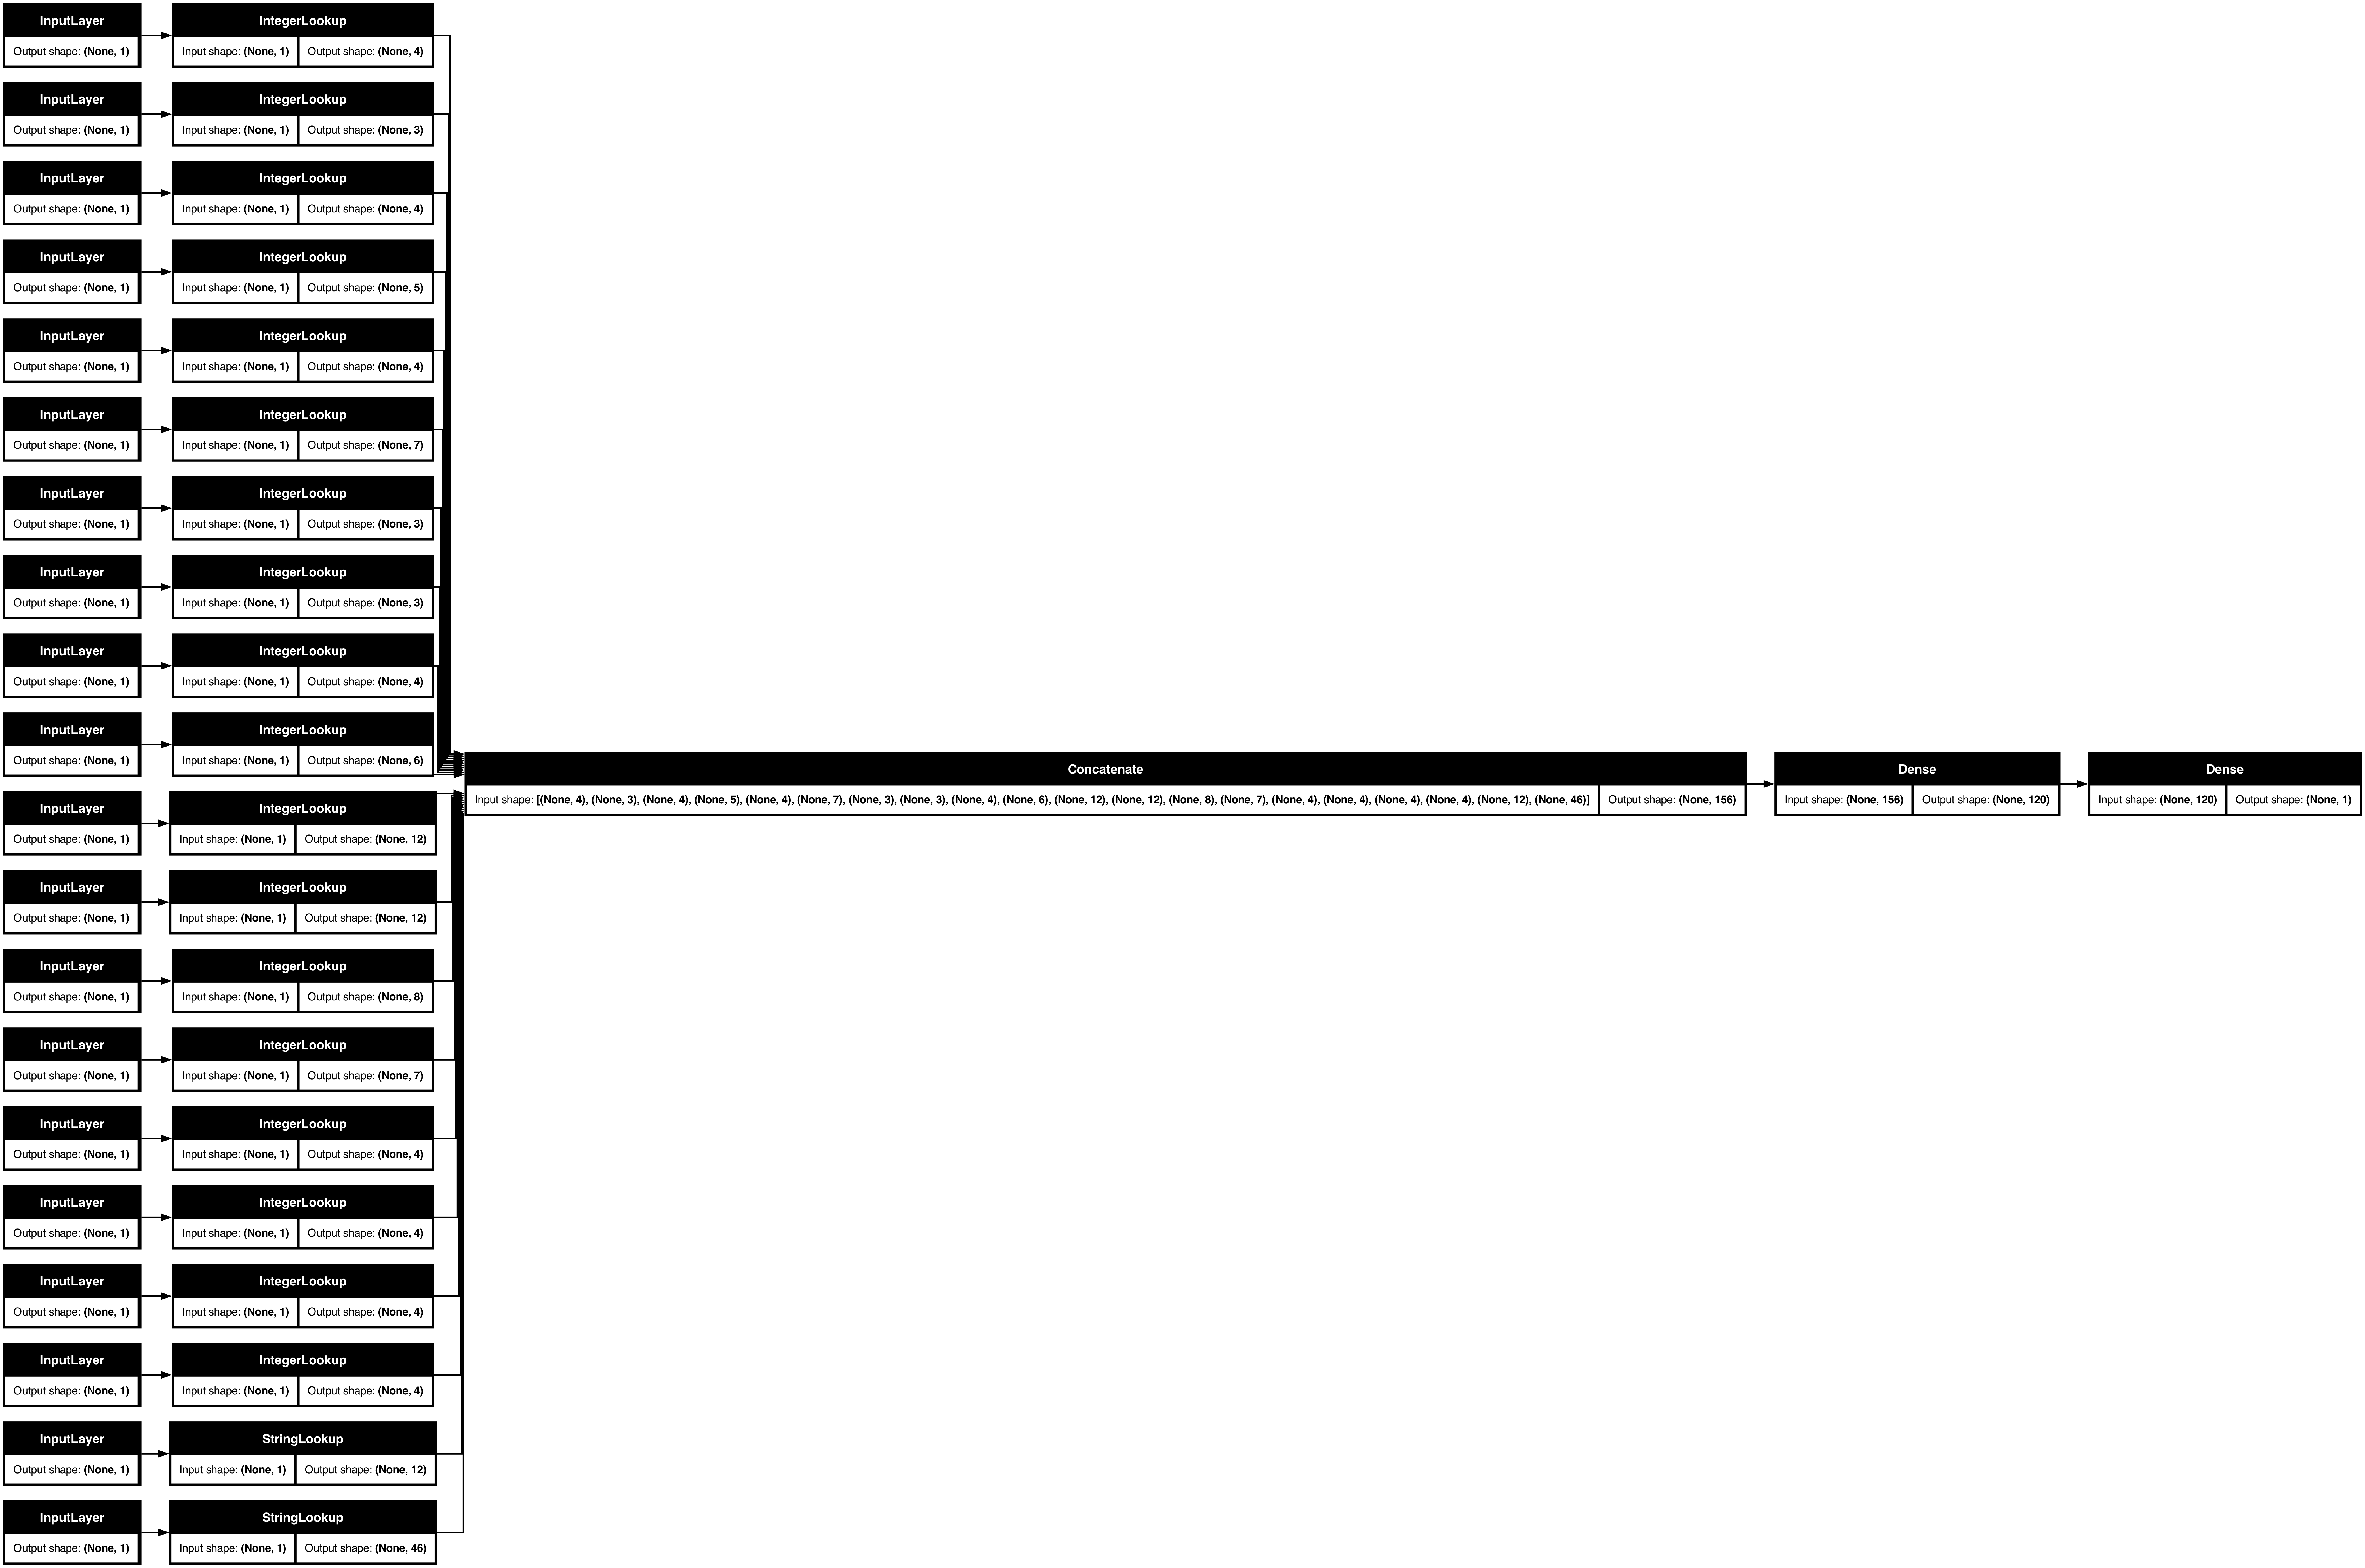

In [40]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

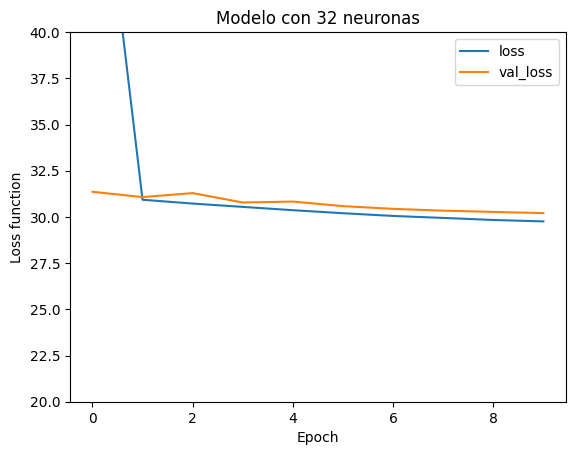

In [41]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.ylim([20, 40])
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.title("Modelo con 32 neuronas")
plt.legend()

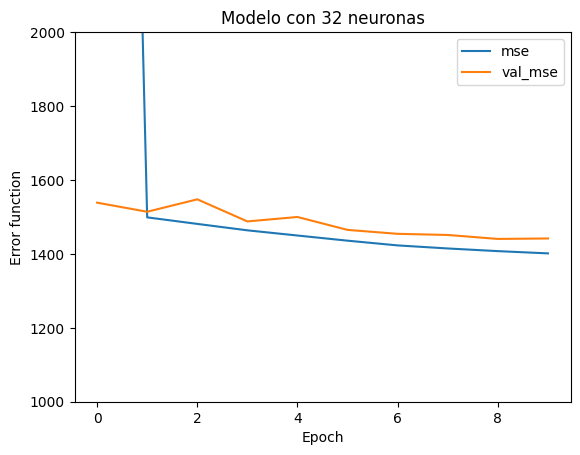

In [42]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mse'], label='mse')
plt.plot(hist.history['val_mse'], label='val_mse')
plt.ylim([1000, 2000])
plt.xlabel('Epoch')
plt.ylabel('Error function')
plt.title("Modelo con 32 neuronas")
plt.legend()

521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


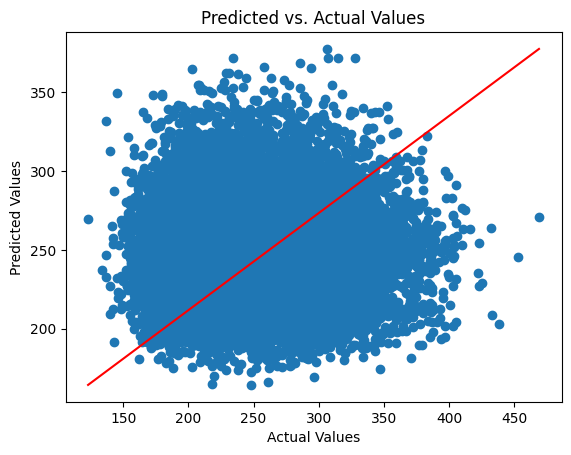

In [43]:
pred_y=model.predict(test_ds)
real_y=test[target]
# Create a scatter plot
plt.scatter(real_y, pred_y)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

# Add a 45-degree line for reference (perfect prediction)
plt.plot([min(real_y), max(real_y)], [min(pred_y), max(pred_y)], color='red')

# Show the plot
plt.show()

Serializar el mejor modelo

In [44]:
from tensorflow.keras.models import save_model

save_model(model, 'models/my_model.keras')